In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The dimension of the synthetic images and the total number of images
dim=32 
imax=10000

# Initializing grid, cylidrical conversion
x=np.linspace(-10,10,dim)
X,Y=np.meshgrid(x,x)
R2 = X**2 + Y**2


datasets_dist=np.zeros((10,imax,32,32)) # Allocate memory
dist=[0.1,0.3,0.5,1,1.5,2,4,7,11,15]    # Gamma


The generated equation in the next cell is written as

$X(\gamma,\Lambda)=\left| \mathcal{F} \left\{ r^2\gamma e^{-r^2\gamma+2\pi i \Lambda} \right\} \right|$

where

$\gamma$ : tunable speckle density

$\Lambda$ : Array of noise $\left[\Lambda_{i,j} ; \Lambda_{i,j} \in [0,1]\right]$

$r$ : radial array

$\mathcal{F}$ : Fourier Transform

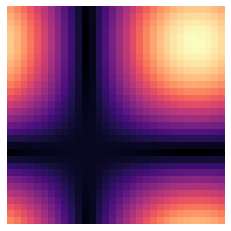

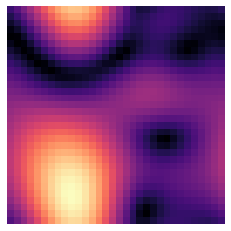

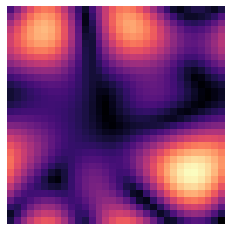

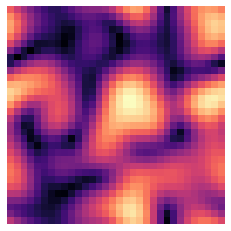

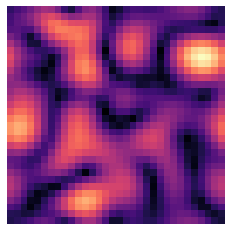

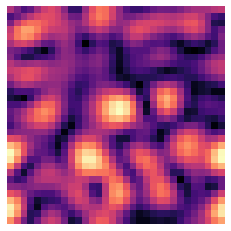

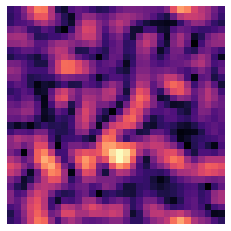

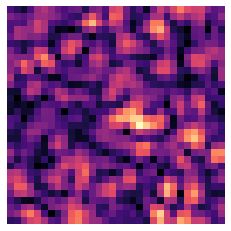

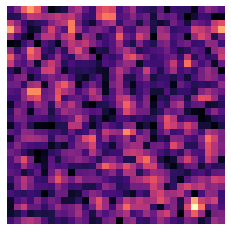

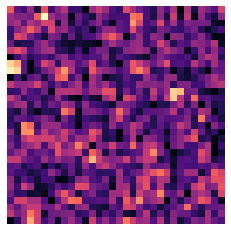

In [4]:
# Carry out the transform and generate the dataset
for i in range(10):
    for j in range(imax):
        lambd = np.random.uniform(size = [dim,dim])
        rand=np.random.randint(0,99)
        datasets_dist[i,j] = np.abs(np.fft.fft2(R2/dist[i]*np.exp(-R2/dist[i])*np.exp(1j*2*np.pi*lambd)))
    plt.imshow(datasets_dist[i,50],cmap='magma')
    plt.axis('off')
    plt.show()

In [6]:
# Save the dataset size(datasets_dist) = [10,imax,dim,dim]
np.save('user_created_data/speckle_datasets.npy',datasets_dist)